In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, log_loss, roc_auc_score, f1_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [ ]:
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataTrain = pd.read_csv('/content/drive/MyDrive/Google SpreadSheet/train (2).csv')
dataTest = pd.read_csv('/content/drive/MyDrive/Google SpreadSheet/test (2).csv')

In [ ]:
dataTrain

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,Tidak,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2000k-3000k
1,937,764,1,1.2,1,1,Tidak,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2000k-3000k
2,1658,1812,1,1.3,1,4,Ya,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,>3000k
3,529,1821,0,0.9,0,9,Ya,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2000k-3000k
4,895,1790,1,2.3,1,3,Ya,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,>3000k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,Tidak,33,1.0,157,1,18,522,563,3796,10.0,5,13,1,1,0,>3000k
1496,1216,1158,0,0.7,1,1,Ya,29,0.7,123,2,20,311,1796,1542,17.0,9,15,1,0,1,1000k-<2000k
1497,1653,1190,0,2.0,1,0,Tidak,40,0.2,93,5,1,1399,1646,3610,13.0,7,9,0,0,1,>3000k
1498,559,1191,0,2.4,1,2,Tidak,13,0.9,169,1,7,179,1813,1028,14.0,6,8,1,1,1,0-<1000k


In [ ]:
dataTest

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,Tidak,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,Tidak,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,Tidak,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,Tidak,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,Ya,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,936,805,0,0.8,0,1,Tidak,34,0.6,88,6,2,1262,1538,3647,18,11,9,1,0,1
496,1524,1162,0,1.0,0,0,Tidak,50,0.5,104,4,10,332,866,1404,10,3,15,1,1,1
497,1415,1759,1,1.4,0,10,Ya,15,0.4,101,4,13,382,1163,2107,18,5,16,1,1,0
498,1223,514,1,1.6,0,7,Ya,37,0.1,172,1,9,956,1723,3392,12,8,5,1,1,1


In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1450 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1381 non-null   float64
 16  lebar_

In [ ]:
dataTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               500 non-null    int64  
 1   daya_baterai        500 non-null    int64  
 2   bluetooth           500 non-null    int64  
 3   kecepatan_clock     500 non-null    float64
 4   dual_sim            500 non-null    int64  
 5   kamera_depan        500 non-null    int64  
 6   four_g              500 non-null    object 
 7   memori_internal     500 non-null    int64  
 8   tebal_hp            500 non-null    float64
 9   berat_hp            500 non-null    int64  
 10  jumlah_prosesor     500 non-null    int64  
 11  kamera_belakang_mp  500 non-null    int64  
 12  px_panjang          500 non-null    int64  
 13  px_lebar            500 non-null    int64  
 14  kapasitas_ram       500 non-null    int64  
 15  panjang_layar       500 non-null    int64  
 16  lebar_la

In [ ]:
pd.isnull(dataTrain).sum()

index                   0
daya_baterai            0
bluetooth               0
kecepatan_clock        50
dual_sim                0
kamera_depan            0
four_g                  0
memori_internal         0
tebal_hp                0
berat_hp                0
jumlah_prosesor         0
kamera_belakang_mp      0
px_panjang              0
px_lebar                0
kapasitas_ram           0
panjang_layar         119
lebar_layar             0
waktu_telfon            0
three_g                 0
touch_screen            0
wifi                    0
price_range             0
dtype: int64

In [ ]:
pd.isnull(dataTest).sum()

index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
dtype: int64

In [ ]:
dataTrain['kecepatan_clock'].fillna(dataTrain['kecepatan_clock'].mean(), inplace=True)
dataTrain['panjang_layar'].fillna(dataTrain['panjang_layar'].mean(), inplace=True)

In [ ]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               1500 non-null   int64  
 1   daya_baterai        1500 non-null   int64  
 2   bluetooth           1500 non-null   int64  
 3   kecepatan_clock     1500 non-null   float64
 4   dual_sim            1500 non-null   int64  
 5   kamera_depan        1500 non-null   int64  
 6   four_g              1500 non-null   object 
 7   memori_internal     1500 non-null   int64  
 8   tebal_hp            1500 non-null   float64
 9   berat_hp            1500 non-null   int64  
 10  jumlah_prosesor     1500 non-null   int64  
 11  kamera_belakang_mp  1500 non-null   int64  
 12  px_panjang          1500 non-null   int64  
 13  px_lebar            1500 non-null   int64  
 14  kapasitas_ram       1500 non-null   int64  
 15  panjang_layar       1500 non-null   float64
 16  lebar_

In [ ]:
pd.isnull(dataTrain).sum()

index                 0
daya_baterai          0
bluetooth             0
kecepatan_clock       0
dual_sim              0
kamera_depan          0
four_g                0
memori_internal       0
tebal_hp              0
berat_hp              0
jumlah_prosesor       0
kamera_belakang_mp    0
px_panjang            0
px_lebar              0
kapasitas_ram         0
panjang_layar         0
lebar_layar           0
waktu_telfon          0
three_g               0
touch_screen          0
wifi                  0
price_range           0
dtype: int64

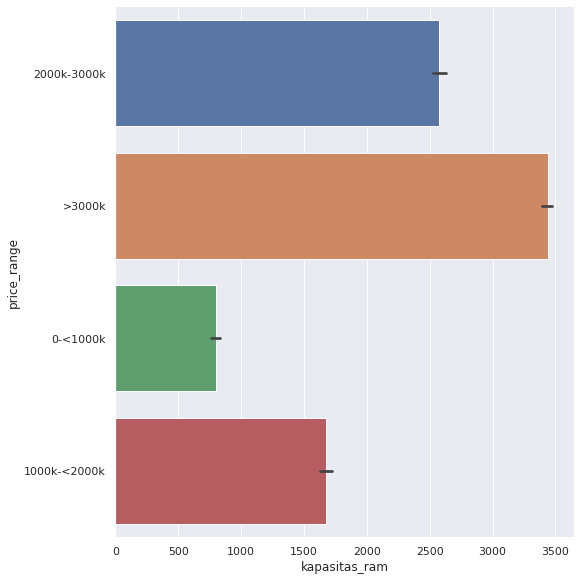

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.catplot(x='kapasitas_ram', y='price_range', data = dataTrain, kind='bar', height=8)

In [ ]:
#Encoding Label Harga

lb_price = LabelEncoder()
lb_price.fit(dataTrain['price_range'])

encode_price = lb_price.transform(dataTrain['price_range'])
dataTrain['price_range'] = encode_price

In [ ]:
#Encoding Label 4G - Train

lb_fourg = LabelEncoder()
lb_fourg.fit(dataTrain['four_g'])

encode_fourg_train = lb_fourg.transform(dataTrain['four_g'])
dataTrain['four_g'] = encode_fourg_train

In [ ]:
dataTrain

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi,price_range
0,1045,531,0,1.1,0,10,0,63,0.7,189,7,14,145,1903,2958,17.0,1,19,0,1,0,2
1,937,764,1,1.2,1,1,0,13,1.0,152,8,2,361,511,3148,18.0,7,6,1,1,0,2
2,1658,1812,1,1.3,1,4,1,42,1.0,162,7,15,380,1550,3338,18.0,13,11,1,1,1,3
3,529,1821,0,0.9,0,9,1,12,0.3,114,1,18,97,1803,2430,7.0,4,6,1,1,1,2
4,895,1790,1,2.3,1,3,1,49,0.5,100,3,11,396,1980,3568,6.0,2,18,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,835,1224,1,1.6,0,9,0,33,1.0,157,1,18,522,563,3796,10.0,5,13,1,1,0,3
1496,1216,1158,0,0.7,1,1,1,29,0.7,123,2,20,311,1796,1542,17.0,9,15,1,0,1,1
1497,1653,1190,0,2.0,1,0,0,40,0.2,93,5,1,1399,1646,3610,13.0,7,9,0,0,1,3
1498,559,1191,0,2.4,1,2,0,13,0.9,169,1,7,179,1813,1028,14.0,6,8,1,1,1,0


In [ ]:
#Encoding Label 4G - Test

lb_fourg = LabelEncoder()
lb_fourg.fit(dataTest['four_g'])

encode_fourg_test = lb_fourg.transform(dataTest['four_g'])
dataTest['four_g'] = encode_fourg_test

In [ ]:
dataTest.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1,1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
2,1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
3,731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
4,1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0


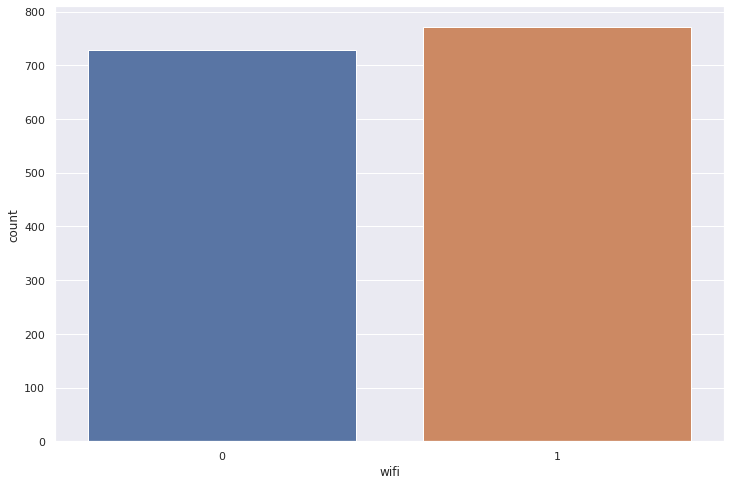

In [ ]:
sns.countplot(x='wifi', data = dataTrain)

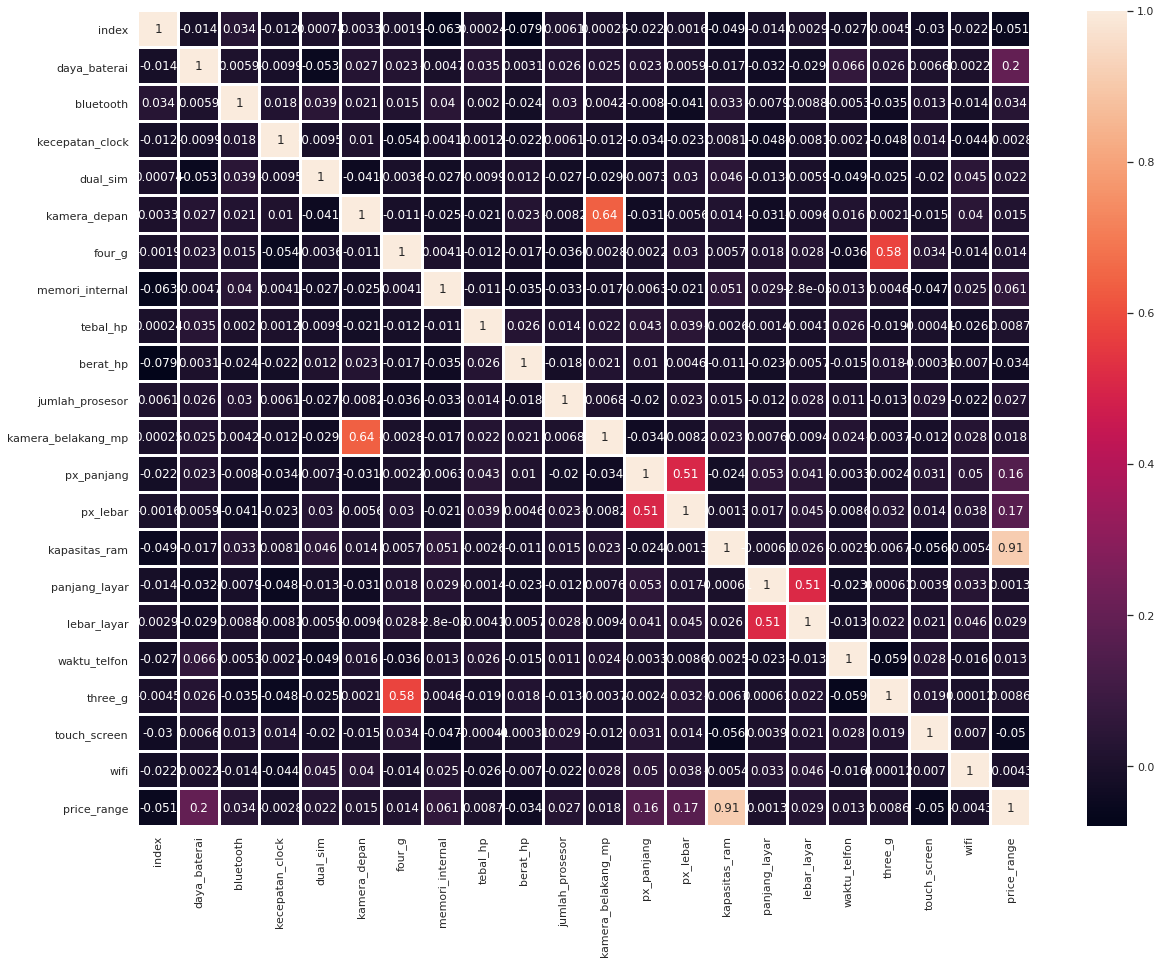

In [ ]:
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(dataTrain.corr(), annot=True, linewidths=2)

In [ ]:
x = dataTrain.drop(['price_range', 'index'], axis=1)

In [ ]:
y = dataTrain['price_range']

In [ ]:
xtst = dataTest.drop(['index'], axis=1)

In [ ]:
#Rescaling Data

cols1 = x.columns
cols2 = dataTest.columns

scaling = StandardScaler()
x = scaling.fit_transform(x)
x_test = scaling.transform(dataTest)

x = pd.DataFrame(x, columns=cols1)
x_test = pd.DataFrame(x_test, columns=cols2)

In [ ]:
x.head()

,index,daya_baterai,bluetooth,kecepatan_clock,dual_sim,kamera_depan,four_g,memori_internal,tebal_hp,berat_hp,jumlah_prosesor,kamera_belakang_mp,px_panjang,px_lebar,kapasitas_ram,panjang_layar,lebar_layar,waktu_telfon,three_g,touch_screen,wifi
0,0.068396,-1.589547,-0.976281,-0.546049,-1.028403,1.369927,-1.033908,1.694932,0.688741,1.420497,1.087565,0.695501,-1.147405,1.471958,0.797948,1.109189,-1.098458,1.454654,-1.779513,1.010724,-1.028403
1,-0.119240,-1.062043,1.024295,-0.423975,0.972381,-0.751433,-1.033908,-1.034662,1.729485,0.365630,1.527281,-1.287239,-0.662840,-1.734394,0.974958,1.348756,0.263267,-0.918454,0.561951,1.010724,-1.028403
2,1.133405,1.310596,1.024295,-0.301901,0.972381,-0.044313,0.967204,0.548503,1.729485,0.650729,1.087565,0.860729,-0.620216,0.658853,1.151968,1.348756,1.624991,-0.005720,0.561951,1.010724,0.972381
3,-0.828088,1.330972,-0.976281,-0.790197,-1.028403,1.134221,0.967204,-1.089253,-0.698917,-0.717746,-1.550733,1.356414,-1.255086,1.241617,0.306046,-1.286479,-0.417596,-0.918454,0.561951,1.010724,0.972381
4,-0.192210,1.260789,1.024295,0.918837,0.972381,-0.280020,0.967204,0.930646,-0.005088,-1.116885,-0.671300,0.199816,-0.584323,1.649321,1.366244,-1.526046,-0.871504,1.272107,0.561951,-0.989390,0.972381


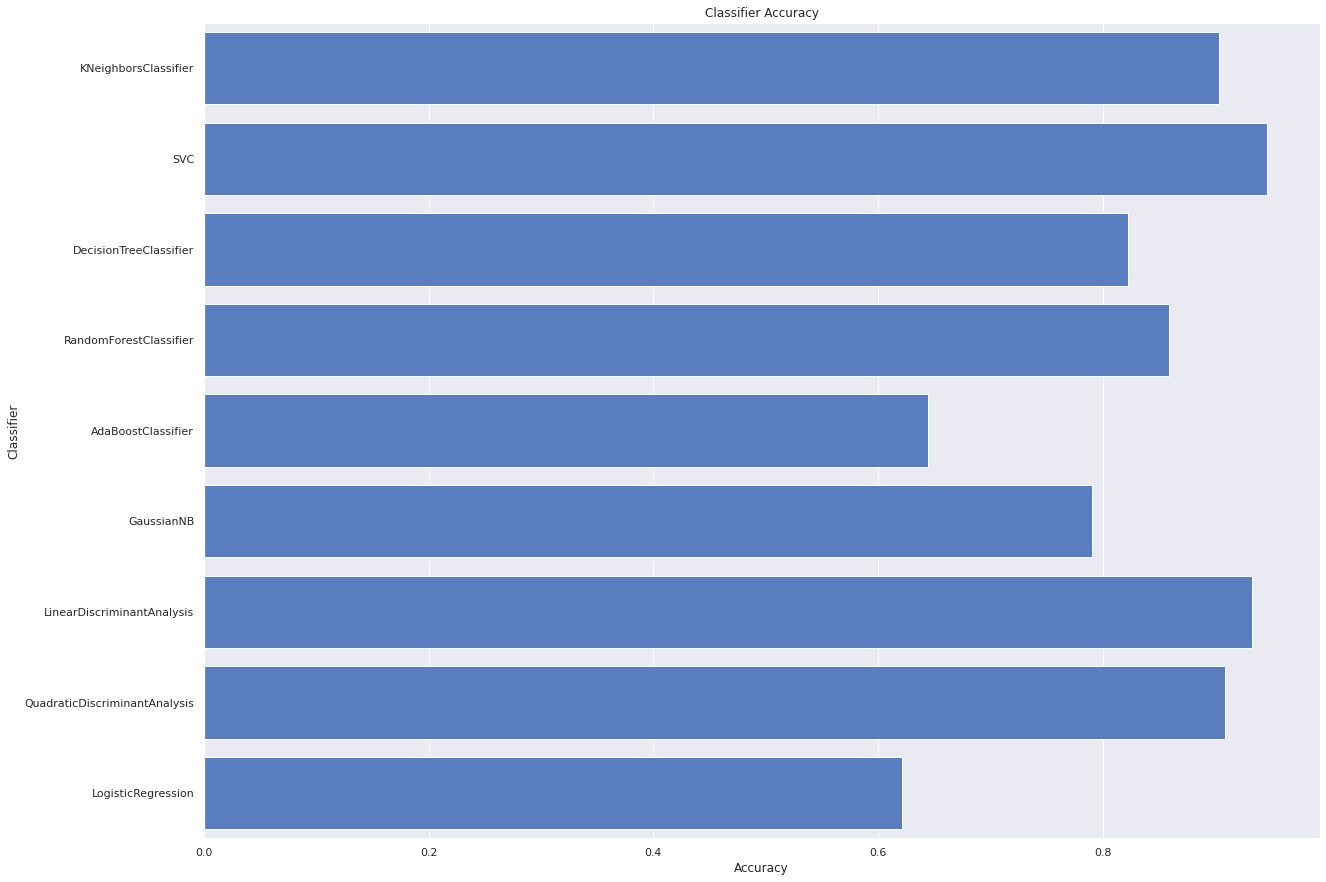

In [ ]:
classifier = [KNeighborsClassifier(3), SVC(probability=True), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GaussianNB(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

split = StratifiedShuffleSplit(n_splits=10, test_size=1/3, random_state=42)

x = x.iloc[:,:].values
y = y.values

acc_dict = {}

for train_index, test_index in split.split(x,y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

    for clf in classifier:
        name = clf.__class__.__name__
        clf.fit(x_train, y_train)
        train_predictions = clf.predict(x_test)
        acc = accuracy_score(y_test, train_predictions)
        if name in acc_dict:
            acc_dict[name] += acc
        else:
            acc_dict[name] = acc

for clf in acc_dict:
    acc_dict[clf] = acc_dict[clf] / 10.0
    log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
    log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data = log, color='b')

In [ ]:
x_test

array([[-1.3128153 , -0.76999077, -0.97628121, ..., -1.77951304,
         1.01072417,  0.97238125],
       [-0.80550257, -1.50351656, -0.97628121, ...,  0.56195149,
        -0.98938962,  0.97238125],
       [-1.2311588 ,  0.21709948,  1.02429504, ...,  0.56195149,
        -0.98938962,  0.97238125],
       ...,
       [-1.50045151,  0.68800493,  1.02429504, ...,  0.56195149,
         1.01072417,  0.97238125],
       [ 0.58613268, -0.90130095, -0.97628121, ...,  0.56195149,
         1.01072417,  0.97238125],
       [-0.527523  , -1.58049149, -0.97628121, ...,  0.56195149,
         1.01072417, -1.02840321]])

# Using Logistic Regression

In [ ]:
#Tuning

model = LogisticRegression()
param = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
         'solver':['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
         'class_weight':['dict','balanced'],
         'C':[0.1, 0.5, 0.25, 1,10]}
gridscv = RandomizedSearchCV(model, param, cv = 10, scoring = 'f1_micro')
gridscv.fit(x, y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': [0.1, 0.5, 0.25, 1, 10],
                                        'class_weight': ['dict', 'balanced'],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'n

In [ ]:
gridscv.best_params_

{'C': 10, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
gridscv.best_score_

0.9673333333333332

In [ ]:
model = gridscv.best_estimator_

In [ ]:
y_pred = model.predict(x_test)
y_pred
len(y_pred)

500

In [ ]:
submission = pd.DataFrame({'index':dataTest['index'], 'price_range':y_pred})
submission.to_csv('submissionCoba.csv', index=False)

In [ ]:
submission

,index,price_range
0,405,2
1,1190,1
2,1132,1
3,731,2
4,1754,2
...,...,...
495,936,0
496,1524,0
497,1415,3
498,1223,2


# Using Decision Tree

In [ ]:
#Tuning Decision Tree

modelDTC = DecisionTreeClassifier()
param = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_split':[1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf':[1,2,3,4,5]
}
rscv = RandomizedSearchCV(modelDTC, param, cv = 10, scoring = 'f1_micro', verbose=3)
rscv.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy, score=0.707, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy, score=0.720, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy, score=0.747, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy, score=0.733, total=   0.0s
[CV] min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy 
[CV]  min_samples_split=4, min_samples_leaf=1, max_depth=10, criterion=entropy, score=0.667, total=   0.0s
[CV] mi

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, score=0.487, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, score=0.487, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, score=0.487, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, score=0.487, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, score=0.487, total=   0.0s
[CV] min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy 
[CV]  min_samples_split=8, min_samples_leaf=5, max_depth=1, criterion=entropy, s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
         

In [ ]:
rscv.best_score_

0.758

In [ ]:
rscv.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [ ]:
 modelDTC = rscv.best_estimator_

In [ ]:
y_pred = modelDTC.predict(x_test)
y_pred

array([2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 0, 1, 2, 3, 1, 0, 3, 1, 2, 3, 0,
       3, 0, 3, 1, 0, 3, 3, 3, 0, 1, 3, 3, 0, 2, 1, 2, 0, 0, 1, 0, 3, 1,
       1, 3, 1, 1, 2, 2, 3, 1, 2, 2, 1, 3, 2, 2, 2, 2, 1, 1, 3, 2, 1, 1,
       3, 0, 1, 2, 3, 1, 2, 2, 2, 3, 1, 3, 0, 3, 0, 3, 0, 1, 0, 3, 2, 1,
       0, 1, 2, 3, 2, 1, 2, 3, 0, 1, 1, 0, 3, 1, 3, 1, 1, 1, 3, 2, 0, 3,
       0, 1, 1, 3, 1, 3, 1, 1, 2, 1, 1, 0, 1, 1, 1, 0, 1, 3, 3, 3, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 3, 3, 2, 0, 0, 3, 1, 3, 0, 0, 0, 0,
       1, 1, 3, 1, 3, 1, 1, 2, 0, 2, 2, 1, 3, 2, 0, 1, 0, 3, 3, 1, 2, 3,
       3, 2, 0, 0, 3, 3, 0, 2, 2, 0, 0, 3, 1, 2, 0, 2, 1, 0, 2, 1, 3, 3,
       3, 3, 1, 3, 1, 1, 3, 0, 2, 3, 1, 2, 3, 2, 0, 1, 2, 0, 2, 2, 2, 1,
       3, 2, 3, 0, 1, 0, 1, 3, 3, 0, 0, 3, 2, 3, 2, 1, 1, 0, 1, 2, 2, 3,
       2, 1, 1, 3, 1, 2, 3, 0, 3, 2, 1, 3, 2, 2, 1, 0, 3, 0, 3, 0, 2, 3,
       0, 3, 0, 0, 0, 1, 0, 3, 3, 3, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 3, 3,
       3, 1, 0, 3, 1, 3, 1, 0, 3, 0, 2, 0, 0, 2, 2,

In [ ]:
subDTC = pd.DataFrame({'index':dataTest['index'], 'price_range':y_pred})
subDTC.to_csv('submissionDTC.csv', index=False)

In [ ]:
subDTC

,index,price_range
0,405,2
1,1190,2
2,1132,1
3,731,2
4,1754,2
...,...,...
495,936,0
496,1524,0
497,1415,3
498,1223,2


# Using SVC

In [ ]:
modelSVC = SVC()
param = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'],
    'probability': [True, False],
    'shrinking': [True, False],
    'random_state': [1, 2, 3, 4, 5]
}
svc = RandomizedSearchCV(modelSVC, param, cv = 10, scoring = 'f1_micro', verbose=3)
svc.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.1s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto, score=0.260, total=   0.2s
[CV] shrinking=False, random_state=4, probability=False, kernel=rbf, gamma=auto 
[CV]  shrinking=False, random_state=4, probability

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  7.3min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'probability': [True, False],
                                        'random_state': [1, 2, 3, 4, 5],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', 

In [ ]:
svc.best_score_

0.9753333333333334

In [ ]:
svc.best_params_

{'gamma': 'scale',
 'kernel': 'linear',
 'probability': False,
 'random_state': 3,
 'shrinking': False}

In [ ]:
 modelSVC = svc.best_estimator_

In [ ]:
y_pred = modelSVC.predict(xtst)
y_pred

array([3, 0, 2, 2, 2, 0, 0, 3, 3, 1, 1, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 2, 2, 3, 1, 3, 1, 1, 0, 2, 0, 1, 3, 0, 0, 3, 3, 2, 1, 3, 3,
       1, 3, 0, 1, 3, 1, 1, 3, 0, 3, 0, 2, 2, 2, 0, 3, 3, 1, 3, 2, 1, 2,
       3, 2, 2, 2, 3, 2, 1, 0, 1, 3, 2, 2, 1, 2, 3, 3, 3, 0, 0, 0, 2, 1,
       2, 3, 1, 2, 2, 1, 0, 3, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 3, 3, 0, 0, 1, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       3, 3, 3, 3, 3, 2, 0, 1, 1, 2, 1, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 0, 0, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 0, 2, 1, 0, 1, 2, 1, 2, 0, 3, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       2, 0, 3, 3, 3, 1, 2, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 2, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 1, 1, 0, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 2, 3, 3, 2, 0, 0, 1, 2,
       3, 2, 2, 3, 2, 1, 0, 3, 3, 2, 1, 3, 2, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       2, 2, 2, 2, 0, 1, 3, 0, 2, 2, 3, 0, 2, 0, 1,

In [ ]:
subSVC = pd.DataFrame({'index':dataTest['index'], 'price_range':y_pred})
subSVC.to_csv('submissionSVC.csv', index=False)

In [ ]:
subSVC

,index,price_range
0,405,3
1,1190,0
2,1132,2
3,731,2
4,1754,2
...,...,...
495,936,3
496,1524,0
497,1415,2
498,1223,3


# Using Random Forest Classifier

In [ ]:
modelRFC = RandomForestClassifier()
param = {
    'n_estimators':[100, 200, 300, 400, 500],
    'criterion':['gini', 'entropy'],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':range(1,20),
    'bootstrap':[True,False],
    'min_samples_split':range(2,10),
    'class_weight':['balanced', 'balanced_subsample'],
    'min_samples_leaf':range(1,5)
}
RFC = RandomizedSearchCV(modelRFC, param, cv = 10, scoring = 'f1_micro', verbose=3)
RFC.fit(x,y)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, score=0.773, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, score=0.747, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, score=0.773, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, score=0.787, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_depth=12, criterion=entropy, class_weight=balanced_subsample, bootstrap=True, score=0.807, total=   1.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=log2, max_dept

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.8min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [ ]:
RFC.best_score_

0.7773333333333332

In [ ]:
RFC.best_params_

{'bootstrap': True,
 'class_weight': 'balanced_subsample',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
 modelRFC = RFC.best_estimator_

In [ ]:
y_pred = modelRFC.predict(x_test)
y_pred

array([2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 2, 3, 1, 0, 3, 1, 3, 3, 0,
       3, 1, 3, 1, 0, 3, 3, 3, 0, 2, 3, 3, 0, 1, 1, 2, 0, 0, 0, 0, 3, 2,
       1, 3, 1, 1, 2, 2, 3, 1, 2, 1, 1, 3, 2, 3, 2, 2, 1, 1, 3, 3, 1, 1,
       2, 0, 0, 2, 3, 2, 2, 3, 2, 3, 1, 3, 0, 3, 0, 3, 1, 1, 0, 3, 2, 1,
       0, 2, 2, 3, 2, 1, 2, 3, 0, 2, 1, 0, 2, 1, 3, 1, 1, 0, 3, 3, 0, 2,
       0, 1, 1, 3, 1, 3, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 3, 3, 2, 0, 3,
       1, 0, 1, 2, 1, 1, 0, 0, 0, 2, 3, 3, 2, 0, 0, 3, 1, 3, 0, 0, 0, 1,
       1, 2, 3, 1, 3, 1, 1, 3, 0, 2, 2, 1, 3, 3, 0, 1, 1, 3, 3, 1, 2, 3,
       3, 2, 0, 0, 3, 3, 0, 2, 2, 0, 0, 3, 1, 2, 0, 2, 1, 0, 2, 1, 2, 3,
       3, 2, 2, 2, 1, 1, 3, 0, 2, 3, 1, 3, 3, 3, 0, 1, 3, 1, 2, 2, 2, 2,
       3, 3, 3, 0, 1, 0, 1, 3, 3, 0, 1, 3, 2, 3, 2, 1, 1, 0, 1, 2, 2, 3,
       2, 2, 1, 3, 1, 2, 3, 0, 3, 2, 1, 3, 1, 2, 1, 0, 3, 0, 3, 0, 2, 3,
       0, 2, 0, 0, 0, 1, 0, 3, 3, 3, 1, 0, 0, 2, 1, 2, 0, 1, 0, 0, 3, 3,
       3, 1, 0, 3, 0, 3, 1, 0, 3, 0, 3, 0, 0, 2, 3,

In [ ]:
subRFC = pd.DataFrame({'index':dataTest['index'], 'price_range':y_pred})
subRFC.to_csv('submissionRFC.csv', index=False)

In [ ]:
subRFC

,index,price_range
0,405,2
1,1190,2
2,1132,1
3,731,2
4,1754,2
...,...,...
495,936,0
496,1524,0
497,1415,3
498,1223,2
